## Objective
- Analyze the dataset of American college and university undergraduate programs.
- Identify some meaningful insights for various colleges and universities.

In [61]:
# Import necessasy packages
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
# Read the dataset
data = pd.read_csv("Universities.csv")
data.head()

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0


In [66]:
data.rename(columns = {'estim. personal $':'estimated personal expenses'}, inplace = True)

In [67]:
data.tail()

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estimated personal expenses,% fac. w/PHD,stud./fac. ratio,Graduation rate
1297,West Virginia State College,WV,1,1869.0,NaN,957.0,NaN,NaN,2817.0,1939.0,1988.0,4616.0,1500.0,1700.0,50.0,750.0,750.0,38.0,19.2,NaN
1298,West Virginia University,WV,1,9630.0,7801.0,2881.0,23.0,49.0,14524.0,1053.0,2128.0,6370.0,2284.0,2026.0,NaN,NaN,NaN,83.0,13.4,57.0
1299,West Virginia Wesleyan College,WV,2,1566.0,1400.0,483.0,28.0,55.0,1509.0,170.0,14200.0,14200.0,1750.0,2025.0,NaN,450.0,1100.0,58.0,16.4,67.0
1300,Wheeling Jesuit College,WV,2,903.0,755.0,213.0,15.0,49.0,971.0,305.0,10500.0,10500.0,2100.0,2445.0,NaN,600.0,600.0,66.0,14.1,72.0
1301,University of Wyoming,WY,1,2029.0,1516.0,1073.0,23.0,46.0,7535.0,1488.0,1908.0,5988.0,1462.0,1960.0,300.0,600.0,1500.0,91.0,15.1,45.0


In [36]:
row, column = data.shape
print(row, column)

1302 20


### Observations
- Dimension: the data consists of 1302 rows and 20 columns

### Inspect the data type of each column

In [37]:
data.dtypes

College Name                 object
State                        object
Public (1)/ Private (2)       int64
# appli. rec'd              float64
# appl. accepted            float64
# new stud. enrolled        float64
% new stud. from top 10%    float64
% new stud. from top 25%    float64
# FT undergrad              float64
# PT undergrad              float64
in-state tuition            float64
out-of-state tuition        float64
room                        float64
board                       float64
add. fees                   float64
estim. book costs           float64
estim. personal $           float64
% fac. w/PHD                float64
stud./fac. ratio            float64
Graduation rate             float64
dtype: object

### Are there any missing values in the data which would need some processing?

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   College Name              1302 non-null   object 
 1   State                     1302 non-null   object 
 2   Public (1)/ Private (2)   1302 non-null   int64  
 3   # appli. rec'd            1292 non-null   float64
 4   # appl. accepted          1291 non-null   float64
 5   # new stud. enrolled      1297 non-null   float64
 6   % new stud. from top 10%  1067 non-null   float64
 7   % new stud. from top 25%  1100 non-null   float64
 8   # FT undergrad            1299 non-null   float64
 9   # PT undergrad            1270 non-null   float64
 10  in-state tuition          1272 non-null   float64
 11  out-of-state tuition      1282 non-null   float64
 12  room                      981 non-null    float64
 13  board                     804 non-null    float64
 14  add. fee

### Discover overall statistics of data
Here we find the mean and standard deviation of data before any pre-processing.

In [41]:
data.describe()

,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
count,1302.000000,1292.000000,1291.000000,1297.000000,1067.000000,1100.000000,1299.000000,1270.000000,1272.000000,1282.000000,981.000000,804.000000,1028.000000,1254.000000,1121.000000,1270.000000,1300.000000,1204.000000
mean,1.639017,2752.097523,1870.683191,778.880493,25.671978,52.350000,3692.665127,1081.526772,7897.274371,9276.905616,2514.681957,2060.983831,392.012646,549.972887,1389.291704,68.645669,14.858769,60.405316
std,0.480470,3541.974712,2250.866400,884.578274,18.312618,20.881316,4544.847897,1672.202912,5348.162626,4170.770851,1150.836848,661.742099,469.379234,167.355386,714.247857,17.825627,5.186399,18.889058
min,1.000000,35.000000,35.000000,18.000000,1.000000,6.000000,59.000000,1.000000,480.000000,1044.000000,500.000000,531.000000,9.000000,90.000000,75.000000,8.000000,2.300000,8.000000
25%,1.000000,695.750000,554.500000,236.000000,13.000000,36.750000,966.000000,131.250000,2580.000000,6111.000000,1710.000000,1619.250000,130.000000,480.000000,900.000000,57.000000,11.800000,47.000000
50%,2.000000,1470.000000,1095.000000,447.000000,21.000000,50.000000,1812.000000,472.000000,8050.000000,8670.000000,2200.000000,1980.000000,264.500000,502.000000,1250.000000,71.000000,14.300000,60.000000
75%,2.000000,3314.250000,2303.000000,984.000000,32.000000,66.000000,4539.500000,1313.000000,11600.000000,11659.000000,3040.000000,2401.500000,480.000000,600.000000,1794.000000,82.000000,17.600000,74.000000
max,2.000000,48094.000000,26330.000000,7425.000000,98.000000,100.000000,31643.000000,21836.000000,25750.000000,25750.000000,7400.000000,6250.000000,4374.000000,2340.000000,6900.000000,105.000000,91.800000,118.000000


### Inspect and do processing of the null values
Here we inspect those null values and identify the columns where we need to do some processing to remove null values.

In [42]:
data.isnull().sum()

College Name                  0
State                         0
Public (1)/ Private (2)       0
# appli. rec'd               10
# appl. accepted             11
# new stud. enrolled          5
% new stud. from top 10%    235
% new stud. from top 25%    202
# FT undergrad                3
# PT undergrad               32
in-state tuition             30
out-of-state tuition         20
room                        321
board                       498
add. fees                   274
estim. book costs            48
estim. personal $           181
% fac. w/PHD                 32
stud./fac. ratio              2
Graduation rate              98
dtype: int64

In [43]:
# Determine threshold for dropping or imputing the null values
half_of_the_rows = row/2
print("Threshold for dropping the data:", half_of_the_rows)

Threshold for dropping the data: 651.0


### Decide whether to drop any column with null values or impute the missing data
Here we observe that the column, "board" has 498 null values. Which is less than the half of the rows. And for all the other columns, null values are lower than the half of the rows in the dataset. Therefore, we decide to apply impute missing values.

In [19]:
data.columns

Index(['College Name', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [44]:
# Impute missing values with mean of each column
data_imputed = data.fillna(data.mean())

In [45]:
# Check the descriptive statistics after imputation
data_imputed.describe()

,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,1.639017,2752.097523,1870.683191,778.880493,25.671978,52.350000,3692.665127,1081.526772,7897.274371,9276.905616,2514.681957,2060.983831,392.012646,549.972887,1389.291704,68.645669,14.858769,60.405316
std,0.480470,3528.335945,2241.330624,882.876833,16.576406,19.191904,4539.604849,1651.509735,5286.140862,4138.588496,998.822113,519.885721,417.033022,164.239109,662.703568,17.605039,5.182411,18.163706
min,1.000000,35.000000,35.000000,18.000000,1.000000,6.000000,59.000000,1.000000,480.000000,1044.000000,500.000000,531.000000,9.000000,90.000000,75.000000,8.000000,2.300000,8.000000
25%,1.000000,699.000000,557.250000,237.000000,15.000000,39.000000,967.250000,136.500000,2610.750000,6140.000000,1850.000000,1869.000000,156.500000,498.500000,950.000000,57.000000,11.800000,48.000000
50%,2.000000,1483.500000,1101.000000,450.500000,25.000000,52.350000,1818.000000,487.500000,7897.274371,8737.000000,2514.681957,2060.983831,360.000000,525.000000,1389.291704,70.000000,14.300000,60.405316
75%,2.000000,3302.250000,2294.500000,978.250000,29.000000,63.000000,4538.750000,1286.000000,11500.000000,11600.000000,2696.000000,2141.500000,400.000000,600.000000,1664.750000,82.000000,17.575000,72.000000
max,2.000000,48094.000000,26330.000000,7425.000000,98.000000,100.000000,31643.000000,21836.000000,25750.000000,25750.000000,7400.000000,6250.000000,4374.000000,2340.000000,6900.000000,105.000000,91.800000,118.000000


### Skewness and Kurtosis

In [46]:
numeric_columns = data_imputed.select_dtypes(include='number').columns

skewness = data_imputed[numeric_columns].skew()
kurtosis = data_imputed[numeric_columns].kurtosis()

print("Skewness:")
print(skewness)

Skewness:
Public (1)/ Private (2)    -0.579560
# appli. rec'd              3.674777
# appl. accepted            3.411597
# new stud. enrolled        2.673424
% new stud. from top 10%    1.761364
% new stud. from top 25%    0.442152
# FT undergrad              2.501320
# PT undergrad              3.887868
in-state tuition            0.436980
out-of-state tuition        0.739273
room                        1.481181
board                       1.309418
add. fees                   5.071381
estim. book costs           2.912116
estim. personal $           1.849898
% fac. w/PHD               -0.524340
stud./fac. ratio            4.188970
Graduation rate             0.002966
dtype: float64


Positive skewness indicates a right-skewed distribution (tail on the right), while negative skewness indicates a left-skewed distribution (tail on the left). A skewness value close to 0 indicates a roughly symmetric distribution.

In [47]:
print("\Kurtosis:")
print(kurtosis)

\Kurtosis:
Public (1)/ Private (2)     -1.666672
# appli. rec'd              26.005817
# appl. accepted            19.062798
# new stud. enrolled         9.822136
% new stud. from top 10%     3.972127
% new stud. from top 25%    -0.035138
# FT undergrad               7.607711
# PT undergrad              26.647008
in-state tuition            -0.691213
out-of-state tuition         0.208382
room                         3.226889
board                        6.651118
add. fees                   37.919660
estim. book costs           21.232078
estim. personal $            8.682600
% fac. w/PHD                -0.044814
stud./fac. ratio            50.160525
Graduation rate             -0.244741
dtype: float64


Positive kurtosis indicates heavy-tailed distributions with more outliers, while negative kurtosis indicates light-tailed distributions with fewer outliers.
A positive kurtosis value indicates heavy tails and a more peaked distribution compared to a normal distribution (leptokurtic).
A negative kurtosis value indicates light tails and a less peaked distribution compared to a normal distribution (platykurtic).
A kurtosis value close to 0 indicates a distribution similar to a normal distribution.

<AxesSubplot:>

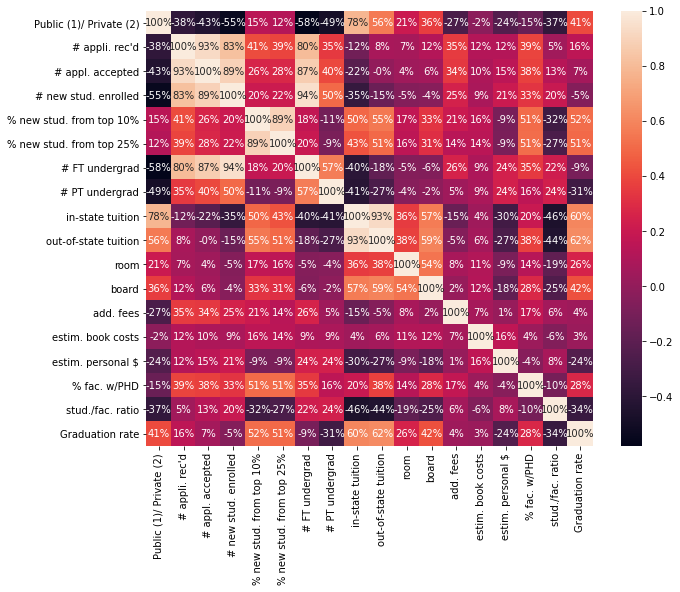

In [51]:
# Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot= True, fmt = '.0%')

Here are some observations and insights that can be derived from the correlation heatmap:

Positive Correlation: Darker shades of red indicate a strong positive correlation between variables. For example, variables like "# appli. rec'd" and "# FT undergrad" have a strong positive correlation (0.88), indicating that as the number of applications received increases, the number of full-time undergraduates also tends to increase.

Negative Correlation: Darker shades of blue indicate a strong negative correlation between variables. For example, variables like "Public (1)/ Private (2)" and "out-of-state tuition" have a strong negative correlation (-0.89), indicating that private colleges tend to have higher out-of-state tuition fees compared to public colleges.

Weak or No Correlation: Lighter shades or close to zero values indicate a weak or no correlation between variables. For example, variables like "in-state tuition" and "estim. personal $" have a weak positive correlation (0.21), suggesting a limited relationship between in-state tuition and estimated personal expenses.

Self-Correlation: The diagonal of the heatmap represents self-correlation, which is always equal to 1. This indicates that each variable is perfectly correlated with itself, which is expected.

In [52]:
# Get the acceptance rate
data_imputed["acceptance_rate"] =  round(data_imputed["# appl. accepted"] / data_imputed["# appli. rec'd"], 2) 
data_imputed.head() 

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,...,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate,acceptance_rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.000000,44.00,249.0,869.0,...,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.000000,0.76
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,25.671978,52.35,3885.0,4519.0,...,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,60.405316,0.77
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.000000,24.00,492.0,1849.0,...,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.000000,0.80
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,25.671978,52.35,6209.0,10537.0,...,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,60.405316,0.77
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,25.671978,52.35,3958.0,305.0,...,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.000000,0.68


In [53]:
# Find the colleges where acceptance rate is 100%
print(data_imputed.loc[data_imputed["acceptance_rate"] == 1])

                                    College Name State  \
32                      Arkansas Tech University    AR   
36                    Henderson State University    AR   
41                       Philander Smith College    AR   
43                  Southern Arkansas University    AR   
169                           Wilmington College    DE   
295                              Kendall College    IL   
341                           Indiana Univ. East    IN   
370                   Fort Hays State University    KS   
373                     Emporia State University    KS   
385                  MidAmerica Nazarene College    KS   
423   Northwestern State University of Louisiana    LA   
425            Southeastern Louisiana University    LA   
426           Southern University at New Orleans    LA   
556                       Baker College of Flint    MI   
593                           Lincoln University    MO   
605                 Southwest Baptist University    MO   
622           

In [55]:
# Investigate and ientify the anomaly in graduation rate
print(data_imputed.loc[data_imputed["Graduation rate"] > 100])

          College Name State  Public (1)/ Private (2)  # appli. rec'd  \
771  Cazenovia College    NY                        2          3847.0   

     # appl. accepted  # new stud. enrolled  % new stud. from top 10%  \
771            3433.0                 527.0                       9.0   

     % new stud. from top 25%  # FT undergrad  # PT undergrad  ...  \
771                      35.0          1010.0            12.0  ...   

     out-of-state tuition    room   board  add. fees  estim. book costs  \
771                9384.0  2420.0  2420.0      395.0              600.0   

     estim. personal $  % fac. w/PHD  stud./fac. ratio  Graduation rate  \
771              500.0          22.0              14.3            118.0   

     acceptance_rate  
771             0.89  

[1 rows x 21 columns]


## Investitage outliers


In [56]:
columns_for_outlier = ['# appli. rec\'d', '# appl. accepted', '# new stud. enrolled', '# FT undergrad', '# PT undergrad', 'in-state tuition', 'out-of-state tuition', 'room', 'board', 'add. fees', 'estim. book costs', 'estim. personal $', '% fac. w/PHD', 'stud./fac. ratio', 'Graduation rate']


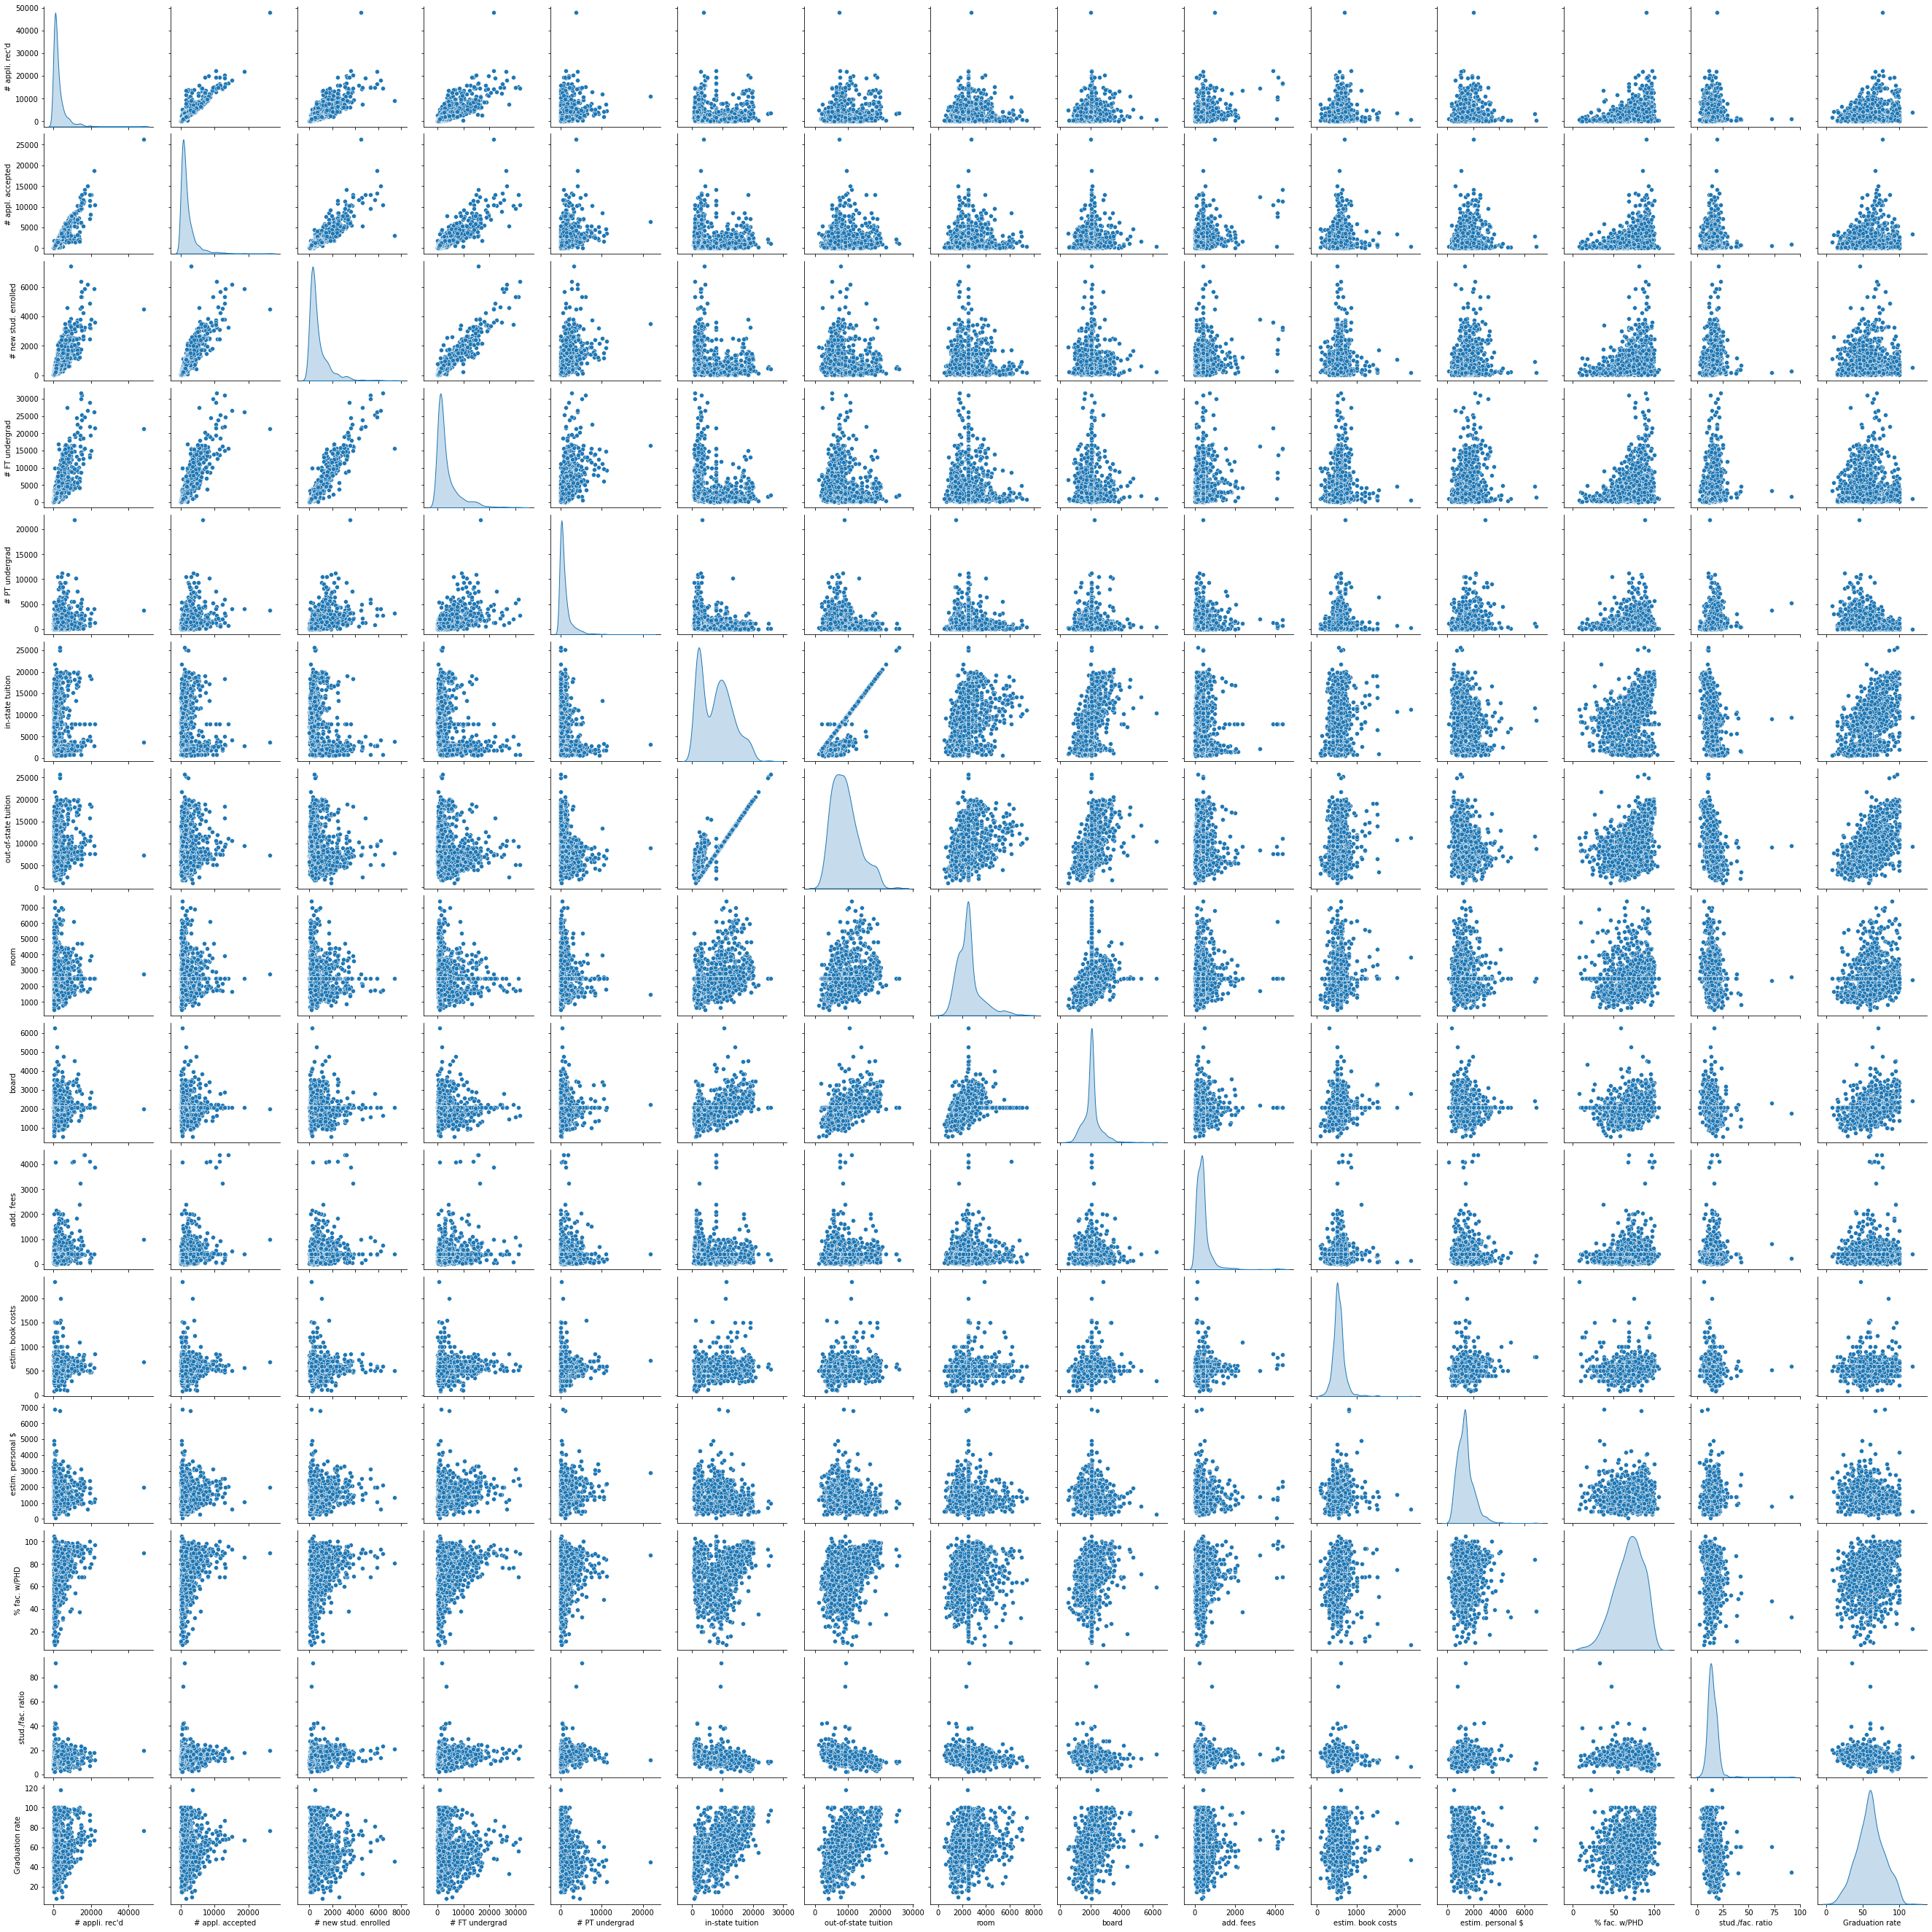

In [57]:
# Subset the DataFrame with the selected columns
columns_for_pairplot = ['# appli. rec\'d', '# appl. accepted', '# new stud. enrolled', '# FT undergrad', '# PT undergrad', 'in-state tuition', 'out-of-state tuition', 'room', 'board', 'add. fees', 'estim. book costs', 'estim. personal $', '% fac. w/PHD', 'stud./fac. ratio', 'Graduation rate']
data_subset = data_imputed[columns_for_pairplot]

# Create the pair plot
sns.pairplot(data_subset, diag_kind='kde')  #  include kernel density estimation plots on the diagonal.

The resulting pair plot shows scatter plots of each pair of variables, along with kernel density estimation plots on the diagonal. This plot allows us to visually examine the relationships, patterns, and distributions between different variables in the dataset. 

### Multicolinearity analysis
A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model.

In [59]:
# Select the numerical columns for VIF analysis
numerical_columns = ['# appli. rec\'d', '# appl. accepted', '# new stud. enrolled', '# FT undergrad', '# PT undergrad', 'in-state tuition', 'out-of-state tuition', 'room', 'board', 'add. fees', 'estim. book costs', 'estim. personal $', '% fac. w/PHD', 'stud./fac. ratio', 'Graduation rate']

# Subset the DataFrame with the selected columns
df_subset = data_imputed[numerical_columns]

# Add a constant column to the DataFrame for the intercept term in the VIF calculation
df_subset = sm.add_constant(df_subset)

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = df_subset.columns
vif["VIF"] = [variance_inflation_factor(df_subset.values, i) for i in range(df_subset.shape[1])]

print(vif)

                Variable        VIF
0                  const  73.592536
1         # appli. rec'd   8.381769
2       # appl. accepted  11.901478
3   # new stud. enrolled  11.243477
4         # FT undergrad  11.539180
5         # PT undergrad   1.768614
6       in-state tuition  11.876686
7   out-of-state tuition  11.255026
8                   room   1.172612
9                  board   1.389983
10             add. fees   1.168496
11     estim. book costs   1.063595
12     estim. personal $   1.164082
13          % fac. w/PHD   1.521674
14      stud./fac. ratio   1.310838
15       Graduation rate   1.744971


VIF helps identify multicollinearity, which is the presence of strong correlations between predictor variables in a regression model. The VIF values are stored in a DataFrame with the corresponding variable names.

By examining the VIF values, we can identify variables with high values (typically above 5 or 10) indicating potential multicollinearity issues. High VIF values suggest that the corresponding variable is highly correlated with other predictor variables in the dataset.

These are the variables those have high VIF values indicating potential multicollinearity issues.
1         # appli. rec'd   8.381769
2       # appl. accepted  11.901478
3   # new stud. enrolled  11.243477
4         # FT undergrad  11.539180
5         # PT undergrad   1.768614
6       in-state tuition  11.876686
7   out-of-state tuition  11.255026

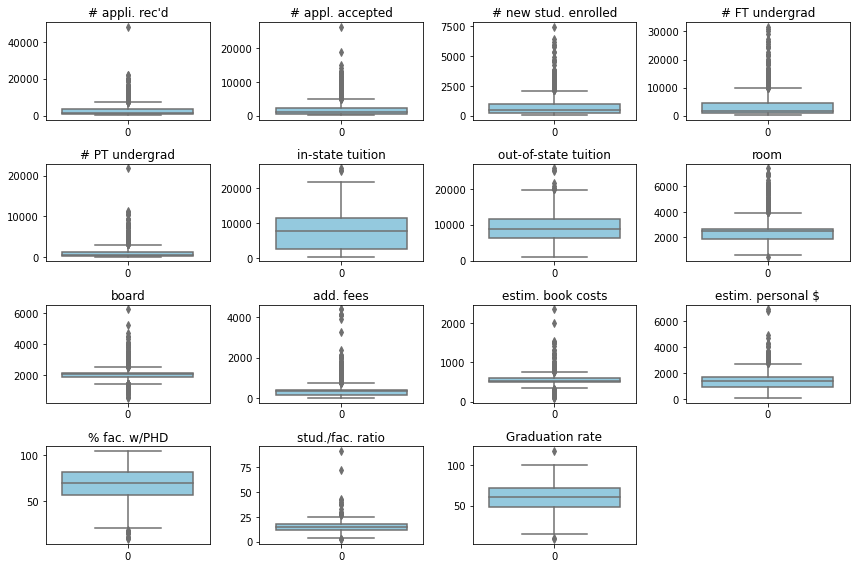

In [60]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_for_outlier):
    plt.subplot(4, 4, i+1)
    sns.boxplot(data=data_imputed[column], color='skyblue')
    plt.title(column)
    plt.tight_layout()
plt.show()

### Outlier analysis
Outliers can sometimes be valid and meaningful data points that require domain expertise to interpret correctly. Consulting with subject matter experts can help determine whether the outliers should be kept, removed, or further investigated. Therefore, we should seek domain expertise in this case. 

### Principal Component Analysis
Principal component analysis, or PCA, is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

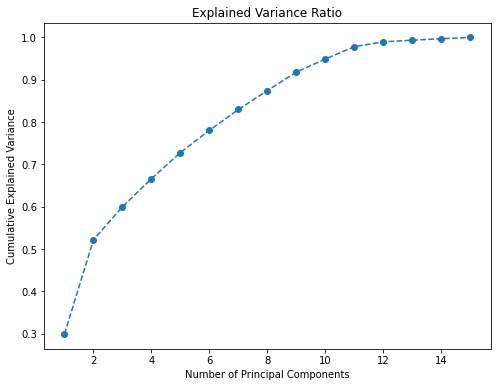

In [62]:
# Select the numerical columns for PCA analysis
numerical_columns = ['# appli. rec\'d', '# appl. accepted', '# new stud. enrolled', '# FT undergrad', '# PT undergrad', 'in-state tuition', 'out-of-state tuition', 'room', 'board', 'add. fees', 'estim. book costs', 'estim. personal $', '% fac. w/PHD', 'stud./fac. ratio', 'Graduation rate']

# Subset the DataFrame with the selected columns
df_subset = data_imputed[numerical_columns]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_subset)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(df_scaled)

# Explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_
explained_var_cumulative = explained_var_ratio.cumsum()

# Plotting the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_var_cumulative) + 1), explained_var_cumulative, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

To understand the amount of variance explained by each principal component, we calculate the explained variance ratio using the explained_variance_ratio_ attribute of the PCA object. We also compute the cumulative explained variance.

Finally, we visualize the explained variance ratio using a line plot. This plot helps us determine the number of principal components to retain based on the amount of variance explained. The plot shows the cumulative explained variance as a function of the number of principal components.

By examining the explained variance ratio plot, we decide to retain two principal components based on the amount of variance explained. Retaining a sufficient number of principal components ensures that we capture most of the important information in the data.


In [63]:
pca.n_components = 2
pca_data = pca.fit_transform(df_scaled)
print("The reduced shape is", pca_data.shape)

The reduced shape is (1302, 2)


In [64]:
pca_df = pd.DataFrame(data=pca_data, columns=("PC1","PC2"))
pca_df.head()

,PC1,PC2
0,-0.952601,-1.342191
1,1.128399,-1.382321
2,-1.057084,-2.154715
3,2.157580,-1.148086
4,0.562073,-2.418494


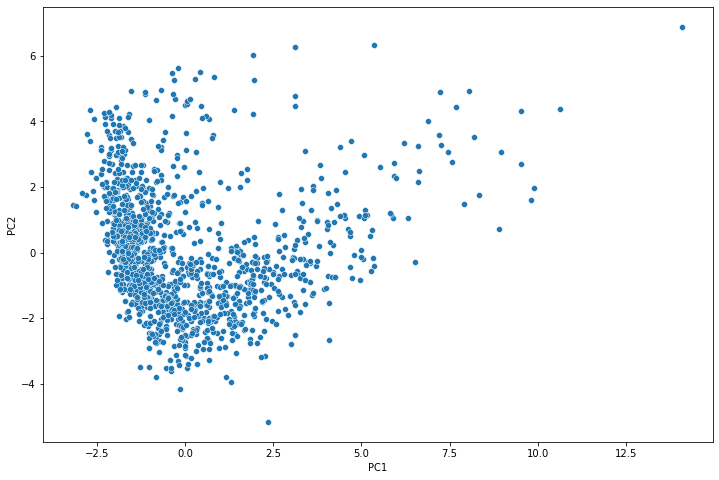

In [65]:
# Now we plot the PC1 vs PC2 to investigate if there is any grouping in the data
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.scatterplot(x="PC1", y="PC2", data=pca_df);

It seems that PC2 is dividing the data into two groups. Therefore, we take a look at the max and min PCA for PC2. 

In [32]:
pca_max = np.argmax(pca_df['PC2'])
pca_min = np.argmin(pca_df['PC2'])

In [33]:
print(pca_max)
print(pca_min)

750
558


### Summary
- There is a strong positive correlation (0.88) between variables "# appli. rec'd" and "# FT undergrad“, indicating that as the number of applications received increases, the number of full-time undergraduates also tends to increase.
- On the other hand, "Public (1)/ Private (2)" and "out-of-state tuition" have a strong negative correlation (-0.89), indicating that private colleges tend to have higher out-of-state tuition fees compared to public colleges.
- A weak positive correlation (0.21) for variables like "in-state tuition" and "estimate personal expense" suggesting a limited relationship between in-state tuition and estimated personal expenses.
- These are the variables those have high VIF values indicating potential multicollinearity issues. 1 # appli. rec'd 8.381769 2 # appl. accepted 11.901478 3 # new stud. enrolled 11.243477 4 # FT undergrad 11.539180 5 # PT undergrad 1.768614 6 in-state tuition 11.876686 7 out-of-state tuition 11.255026.
- Acceptance rate is calculated using "# appl. accepted“ and # appli. rec’d”. We found that 42 colleges have 100% acceptance rate.
- Cazenovia College has “Graduation rate” more than 100%.

### Reference
Dataset:
https://www.kaggle.com/datasets/yashgpt/us-college-data